In [27]:
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import torch

In [28]:
image = cv2.imread("test_image.jpg")

In [29]:
model = YOLO("runs/detect/train5/weights/best.pt")
results = model.predict(source=image, conf=0.25)

Ultralytics YOLOv8.0.48 🚀 Python-3.7.13 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

0: 480x800 10 players, 1 ball, 1 fieldgoal, 6.7ms
Speed: 0.2ms preprocess, 6.7ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 800)


In [34]:
coordinates = results[0].boxes.xyxy
classes = results[0].boxes.cls
classes = torch.tensor(classes, dtype=torch.int32)

for cord, cls in zip(coordinates, classes):
    if cls == 1:
        x1 = int(cord[0])
        y1 = int(cord[1])
        x2 = int(cord[2])
        y2 = int(cord[3])
        image = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

/home/omnoai/anaconda3/envs/yolov7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


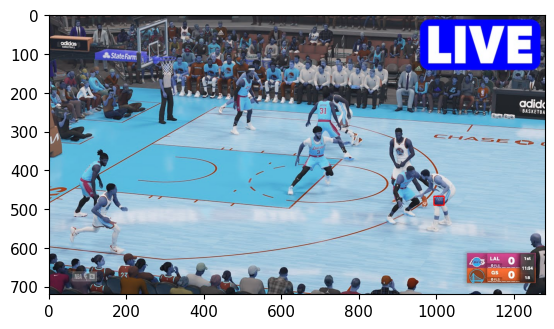

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image)
